**SISTEM REKOMENDASI DESTINASI WISATA PESONA**

---
username : `davidmarioys`


# Data Wrangling
  1. Gathering Data = Mengidentifikasi libraries dan Membaca dataset
  2. Assessing Data = Memeriksa dan memahami data
  3. Cleaning Data = Membersihkan data dari kesalahan/error

## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Mengunggah file dari komputer lokal
uploaded = files.upload()

Saving PesoNa.csv to PesoNa.csv


In [3]:
# Load Dataset
df = pd.read_csv('./PesoNa.csv')

In [4]:
print(f'Dataset PesoNa: {df}')

Dataset PesoNa:                  Provinsi KabupatenKota              NamaWisata  Rating  \
0                    Bali      Buleleng       Air Terjun Gitgit     4.4   
1                    Bali      Buleleng     Air Terjun Sekumpul     4.1   
2                    Bali      Buleleng        Air Panas Banjar     4.3   
3                    Bali      Buleleng         Pulau Menjangan     4.7   
4                    Bali      Buleleng        Pantai Pemuteran     4.3   
...                   ...           ...                     ...     ...   
1844  Nusa Tenggara Timur        Kupang           Pantai Salupu     4.2   
1845  Nusa Tenggara Timur        Kupang           Pantai Oesapa     4.4   
1846  Nusa Tenggara Timur        Kupang  Pantai Inokiu, Lalendo     4.4   
1847  Nusa Tenggara Timur        Kupang         Pantai Walikota     5.0   
1848  Nusa Tenggara Timur        Kupang         Pantai Paradiso     4.3   

     Reviews JenisWisata   Latitude   Longitude  
0        725         Air  -8.2041

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       1849 non-null   object 
 1   KabupatenKota  1849 non-null   object 
 2   NamaWisata     1849 non-null   object 
 3   Rating         1849 non-null   float64
 4   Reviews        1849 non-null   object 
 5   JenisWisata    1849 non-null   object 
 6   Latitude       1849 non-null   float64
 7   Longitude      1849 non-null   float64
dtypes: float64(3), object(5)
memory usage: 115.7+ KB


In [6]:
df.describe()

,Rating,Latitude,Longitude
count,1849.000000,1849.000000,1849.000000
mean,4.491942,-8.760830,118.570940
std,0.452093,0.583674,3.522892
min,1.000000,-10.952711,111.679807
25%,4.300000,-8.822329,115.255076
50%,4.500000,-8.580304,116.889892
75%,4.800000,-8.421957,121.548081
max,5.000000,-8.068653,125.105429


## Assessing Data

In [7]:
print('IDENTIFIKASI DATA')
print(f'\nData Kosong: {df.isnull().sum().sum()}')
print(f'Data Duplikat: {df.duplicated().sum()}')
print(f'\nJumlah Data: {df.shape[0]}')
print(f'Jumlah Kolom: {df.shape[1]}')
print(f'Kolom: {df.columns.tolist()}')
print(f'Tipe Data: {df.dtypes.tolist()}')
print(f'\nNilai Terkecil: \n{df.min()}')
print(f'\nNilai Terbesar: \n{df.max()}')
print(f'\nJumlah Nilai Unique: \n{df.nunique()}')

IDENTIFIKASI DATA

Data Kosong: 0
Data Duplikat: 0

Jumlah Data: 1849
Jumlah Kolom: 8
Kolom: ['Provinsi', 'KabupatenKota', 'NamaWisata', 'Rating', 'Reviews', 'JenisWisata', 'Latitude', 'Longitude']
Tipe Data: [dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64')]

Nilai Terkecil: 
Provinsi                     Bali
KabupatenKota                Alor
NamaWisata        Wadu jao Pantai
Rating                        1.0
Reviews                         1
JenisWisata                   Air
Latitude               -10.952711
Longitude              111.679807
dtype: object

Nilai Terbesar: 
Provinsi         Nusa Tenggara Timur
KabupatenKota     Timor Tengah Utara
NamaWisata             upersuck Wave
Rating                           5.0
Reviews                          995
JenisWisata                    Taman
Latitude                   -8.068653
Longitude                 125.105429
dtype: object

Jumlah Nilai Unique: 
Provinsi            3

VISUALISASI DATA



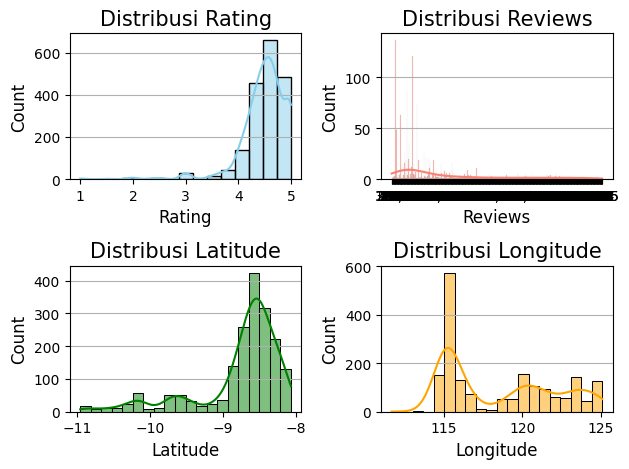

In [8]:
print('VISUALISASI DATA\n')

# Subplot untuk Rating
plt.subplot(2, 2, 1)
sns.histplot(df['Rating'], kde=True, color='skyblue', bins=15)
plt.title('Distribusi Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Reviews
plt.subplot(2, 2, 2)
sns.histplot(df['Reviews'], kde=True, color='salmon', bins=20)
plt.title('Distribusi Reviews', fontsize=15)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Latitude
plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], kde=True, color='green', bins=20)
plt.title('Distribusi Latitude', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Longitude
plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], kde=True, color='orange', bins=20)
plt.title('Distribusi Longitude', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [9]:
# Filter kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
correlation_matrix = df[numeric_columns].corr()

print("Matrix Korelasi Antar Variabel Numerik:")
print(correlation_matrix)

Matrix Korelasi Antar Variabel Numerik:
             Rating  Latitude  Longitude
Rating     1.000000  0.007026  -0.038861
Latitude   0.007026  1.000000  -0.510618
Longitude -0.038861 -0.510618   1.000000


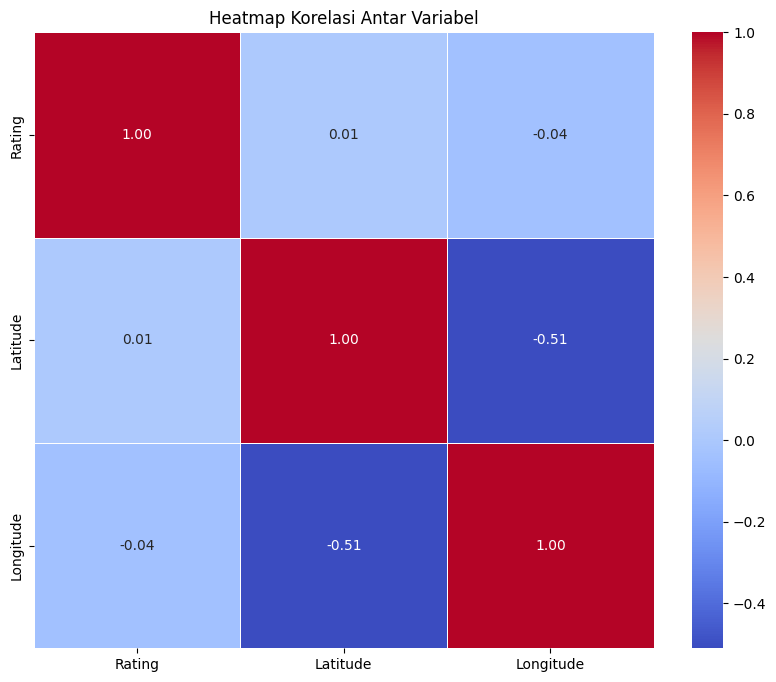

In [10]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## Cleaning Data

In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for missing values after dropping rows
print(df.isnull().sum())

Provinsi         0
KabupatenKota    0
NamaWisata       0
Rating           0
Reviews          0
JenisWisata      0
Latitude         0
Longitude        0
dtype: int64


In [12]:
# Ubah kolom Reviews menjadi tipe float64
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
# Cek tipe data setelah perubahan
print(df.dtypes)

Provinsi          object
KabupatenKota     object
NamaWisata        object
Rating           float64
Reviews          float64
JenisWisata       object
Latitude         float64
Longitude        float64
dtype: object


In [13]:
# Convert potentially problematic columns to numeric types
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

print('Identifikasi Data Outlier')
numeric_columns = ['Reviews']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_columns = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
outliers = df[outlier_columns]

print(f'Jumlah Data Outlier: {outliers.shape[0]}')
print(f'Data Outlier: {outliers}')

Identifikasi Data Outlier
Jumlah Data Outlier: 254
Data Outlier:                  Provinsi KabupatenKota              NamaWisata  Rating  \
0                    Bali      Buleleng       Air Terjun Gitgit     4.4   
1                    Bali      Buleleng     Air Terjun Sekumpul     4.1   
2                    Bali      Buleleng        Air Panas Banjar     4.3   
6                    Bali      Buleleng  Air Terjun Aling-Aling     4.6   
12                   Bali      Buleleng      Pantai Penimbangan     4.4   
...                   ...           ...                     ...     ...   
1824  Nusa Tenggara Timur        Kupang           Pasir Panjang     4.3   
1829  Nusa Tenggara Timur        Kupang           Lasiana Beach     4.3   
1832  Nusa Tenggara Timur        Kupang         Pantai Namosain     4.2   
1836  Nusa Tenggara Timur        Kupang         Batu Nona Beach     4.3   
1840  Nusa Tenggara Timur        Kupang     Ketapang Satu Beach     4.3   

      Reviews JenisWisata   Latitu

In [14]:
# Fungsi untuk menghapus outlier secara berulang
def remove_outliers(df, numeric_columns):
    while True:
        Q1 = df[numeric_columns].quantile(0.25)
        Q3 = df[numeric_columns].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_columns = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
        outliers = df[outlier_columns]

        if outliers.empty:
            break

        df = df[~outlier_columns]

    return df

# Menghapus outlier secara berulang
df_cleaned = remove_outliers(df, numeric_columns)

print("Data setelah menghapus outlier:")
print(df_cleaned)


Data setelah menghapus outlier:
                 Provinsi KabupatenKota                    NamaWisata  Rating  \
10                   Bali      Buleleng                     Pura Beji     5.0   
13                   Bali      Buleleng              Pantai Lokapaksa     4.3   
26                   Bali      Buleleng               Pantai Gerokgak     4.6   
30                   Bali      Buleleng              Pantai Banyuning     4.8   
36                   Bali      Buleleng         Pantai Segara Sangsit     4.1   
...                   ...           ...                           ...     ...   
1834  Nusa Tenggara Timur        Kupang  Pantai Warna Kota Kupang NTT     4.4   
1837  Nusa Tenggara Timur        Kupang       Pantai wisata Tablolong     4.4   
1841  Nusa Tenggara Timur        Kupang                 Pantai Wisata     4.5   
1843  Nusa Tenggara Timur        Kupang               Pantai Namoanak     5.0   
1847  Nusa Tenggara Timur        Kupang               Pantai Walikota     5.0

In [15]:
print(f'Jumlah Data Asli {df.shape}')
print(f'Jumlah Data Setelah Hapus Outlier {df_cleaned.shape}')

Jumlah Data Asli (1849, 8)
Jumlah Data Setelah Hapus Outlier (910, 8)


In [16]:
df_cleaned

,Provinsi,KabupatenKota,NamaWisata,Rating,Reviews,JenisWisata,Latitude,Longitude
10,Bali,Buleleng,Pura Beji,5.0,1.0,Religi,-8.195779,114.651728
13,Bali,Buleleng,Pantai Lokapaksa,4.3,7.0,Air,-8.376506,111.679807
26,Bali,Buleleng,Pantai Gerokgak,4.6,5.0,Air,-8.176191,114.774261
30,Bali,Buleleng,Pantai Banyuning,4.8,26.0,Air,-8.095731,115.058986
36,Bali,Buleleng,Pantai Segara Sangsit,4.1,13.0,Air,-8.082290,115.122748
...,...,...,...,...,...,...,...,...
1834,Nusa Tenggara Timur,Kupang,Pantai Warna Kota Kupang NTT,4.4,25.0,Air,-10.142445,123.649319
1837,Nusa Tenggara Timur,Kupang,Pantai wisata Tablolong,4.4,21.0,Air,-10.322331,123.462315
1841,Nusa Tenggara Timur,Kupang,Pantai Wisata,4.5,8.0,Air,-10.117308,123.691436
1843,Nusa Tenggara Timur,Kupang,Pantai Namoanak,5.0,2.0,Air,-10.307380,123.476395


In [17]:
# Filter kolom numerik
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
correlation_matrix = df_cleaned[numeric_columns].corr()

print("Matrix Korelasi Antar Variabel Numerik:")
print(correlation_matrix)

Matrix Korelasi Antar Variabel Numerik:
             Rating   Reviews  Latitude  Longitude
Rating     1.000000 -0.041042 -0.018770  -0.054192
Reviews   -0.041042  1.000000 -0.014046  -0.244400
Latitude  -0.018770 -0.014046  1.000000  -0.378208
Longitude -0.054192 -0.244400 -0.378208   1.000000


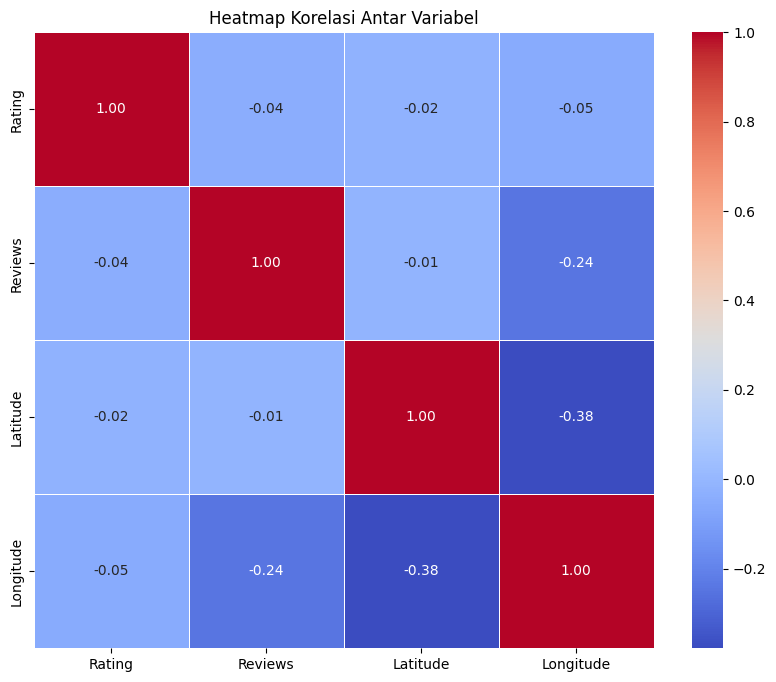

In [18]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## Exploratory Data Analysis (EDA) || Data Preprocessing

VISUALISASI DATA



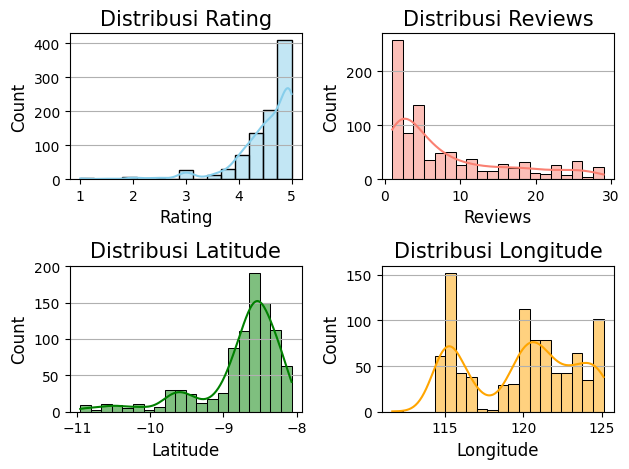

In [19]:
print('VISUALISASI DATA\n')

# Subplot untuk Rating
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['Rating'], kde=True, color='skyblue', bins=15)
plt.title('Distribusi Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Reviews
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['Reviews'], kde=True, color='salmon', bins=20)
plt.title('Distribusi Reviews', fontsize=15)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Latitude
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['Latitude'], kde=True, color='green', bins=20)
plt.title('Distribusi Latitude', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

# Subplot untuk Longitude
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Longitude'], kde=True, color='orange', bins=20)
plt.title('Distribusi Longitude', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [20]:
df_cleaned['Provinsi'].value_counts()

Provinsi
Nusa Tenggara Timur    579
Bali                   214
Nusa Tenggara Barat    117
Name: count, dtype: int64

In [21]:
df_cleaned['KabupatenKota'].value_counts()

KabupatenKota
Manggarai               135
Buleleng                 57
Nagekeo                  46
Alor                     45
Flores Timur             42
Ngada                    41
Lembata                  38
Belu                     37
Ende                     34
Sumbawa Barat            33
Jembrana                 32
Mataram                  27
Bangli                   26
Karangasem               26
Klungkung                22
Denpasar                 20
Sumba Timur              20
Timor Tengah Selatan     19
Bima                     18
Raijua                   18
Timor Tengah Utara       17
Malaka                   16
Sikka                    16
Badung                   16
Kupang                   14
Dompu                    14
Ndao                     13
Sumba Barat              12
Tabanan                  12
Sumba Tengah             11
Lombok Tengah             8
Lombok Timur              7
Sumba Barat Daya          5
Lombok Utara              4
Lombok Barat              4
Gianya

In [22]:
df_cleaned['JenisWisata'].value_counts()

JenisWisata
Air        559
Taman      197
Bukit      114
Religi      26
Monumen     14
Name: count, dtype: int64

In [23]:
# Menghitung jumlah data pada kolom 'Rating' berdasarkan jumlah bintang
rating_counts = df_cleaned['Rating'].value_counts().sort_index()

# Menampilkan jumlah data untuk setiap jumlah bintang
print("Jumlah data berdasarkan jumlah bintang pada Rating:")
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count} data")

Jumlah data berdasarkan jumlah bintang pada Rating:
Rating 1.0: 3 data
Rating 1.5: 2 data
Rating 2.0: 6 data
Rating 2.3: 2 data
Rating 2.5: 4 data
Rating 2.6: 1 data
Rating 3.0: 26 data
Rating 3.1: 2 data
Rating 3.3: 1 data
Rating 3.4: 1 data
Rating 3.5: 9 data
Rating 3.6: 3 data
Rating 3.7: 13 data
Rating 3.8: 8 data
Rating 3.9: 10 data
Rating 4.0: 38 data
Rating 4.1: 32 data
Rating 4.2: 36 data
Rating 4.3: 52 data
Rating 4.4: 48 data
Rating 4.5: 75 data
Rating 4.6: 70 data
Rating 4.7: 59 data
Rating 4.8: 84 data
Rating 4.9: 67 data
Rating 5.0: 258 data


In [24]:
# Label Encoding pada Fitur Kategorikal
## Cek nilai unik pada kolom JenisWisata
print("Nilai unik sebelum encoding:")
print(df_cleaned['JenisWisata'].unique())

## Lakukan Label Encoding pada kolom JenisWisata
label_jenis_wisata = LabelEncoder()
df_cleaned['JenisWisata_Encoded'] = label_jenis_wisata.fit_transform(df_cleaned['JenisWisata'])
label_mapping_jenis_wisata = dict(zip(label_jenis_wisata.classes_, label_jenis_wisata.transform(label_jenis_wisata.classes_)))

## Cek nilai unik setelah encoding
print("\nLabel Mapping Jenis Wisata:")
print(label_mapping_jenis_wisata)

Nilai unik sebelum encoding:
['Religi' 'Air' 'Taman' 'Bukit' 'Monumen']

Label Mapping Jenis Wisata:
{'Air': 0, 'Bukit': 1, 'Monumen': 2, 'Religi': 3, 'Taman': 4}


In [25]:
from geopy.distance import geodesic
# Menghitung Jarak
current_location = (-8.123528019761865, 115.06461953075772)  # Contoh koordinat pengguna saat ini

# Fungsi untuk menghitung jarak
def calculate_distance(location1, location2):
    return geodesic(location1, location2).kilometers

# Menambahkan kolom jarak ke DataFrame
df_cleaned['Jarak'] = df_cleaned.apply(lambda row: calculate_distance(current_location, (row['Latitude'], row['Longitude'])), axis=1)

df_cleaned.sort_values(by='Jarak', ascending=True).head(10)

,Provinsi,KabupatenKota,NamaWisata,Rating,Reviews,JenisWisata,Latitude,Longitude,JenisWisata_Encoded,Jarak
147,Bali,Buleleng,Plaza Kuliner Pantai Penimbangan,3.5,2.0,Taman,-8.121505,115.064898,4,0.225775
30,Bali,Buleleng,Pantai Banyuning,4.8,26.0,Air,-8.095731,115.058986,0,3.136303
132,Bali,Buleleng,Pantai Kampung Baru,3.3,4.0,Air,-8.103945,115.086146,0,3.212392
134,Bali,Buleleng,Pantai penarukan,4.6,24.0,Air,-8.085515,115.112331,0,6.732470
36,Bali,Buleleng,Pantai Segara Sangsit,4.1,13.0,Air,-8.082290,115.122748,0,7.864183
142,Bali,Buleleng,Canging Waterfall,4.8,14.0,Air,-8.203177,115.100681,0,9.663799
135,Bali,Buleleng,Pantai yeh lembu,3.9,9.0,Air,-8.075847,115.138374,0,9.689586
143,Bali,Buleleng,Air Terjun Cemara,4.9,5.0,Air,-8.204104,115.101549,0,9.796751
144,Bali,Buleleng,Air Terjun Campuhan,4.5,2.0,Air,-8.208374,115.102986,0,10.292123
38,Bali,Buleleng,Pantai Tejakula,4.5,8.0,Air,-8.112644,115.158242,0,10.388272


In [26]:
df_cleaned['Jarak']

10       46.196935
13      373.968619
26       32.523989
30        3.136303
36        7.864183
           ...    
1834    969.597021
1837    954.248954
1841    973.502096
1843    955.345114
1847    964.833261
Name: Jarak, Length: 910, dtype: float64

In [27]:
import folium

# Membuat peta sebaran geografis tempat wisata
map_nusa_tenggara = folium.Map(location=[-8.123528019761865, 115.06461953075772], zoom_start=6)
for _, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['NamaWisata']).add_to(map_nusa_tenggara)

map_nusa_tenggara

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 10 to 1847
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provinsi             910 non-null    object 
 1   KabupatenKota        910 non-null    object 
 2   NamaWisata           910 non-null    object 
 3   Rating               910 non-null    float64
 4   Reviews              905 non-null    float64
 5   JenisWisata          910 non-null    object 
 6   Latitude             910 non-null    float64
 7   Longitude            910 non-null    float64
 8   JenisWisata_Encoded  910 non-null    int64  
 9   Jarak                910 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.2+ KB


In [29]:
# Filter kolom numerik
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
correlation_matrix = df_cleaned[numeric_columns].corr()

print("Matrix Korelasi Antar Variabel Numerik:")
print(correlation_matrix)

Matrix Korelasi Antar Variabel Numerik:
                       Rating   Reviews  Latitude  Longitude  \
Rating               1.000000 -0.041042 -0.018770  -0.054192   
Reviews             -0.041042  1.000000 -0.014046  -0.244400   
Latitude            -0.018770 -0.014046  1.000000  -0.378208   
Longitude           -0.054192 -0.244400 -0.378208   1.000000   
JenisWisata_Encoded  0.037045 -0.068329  0.080911  -0.143151   
Jarak               -0.052540 -0.237588 -0.397653   0.996093   

                     JenisWisata_Encoded     Jarak  
Rating                          0.037045 -0.052540  
Reviews                        -0.068329 -0.237588  
Latitude                        0.080911 -0.397653  
Longitude                      -0.143151  0.996093  
JenisWisata_Encoded             1.000000 -0.145999  
Jarak                          -0.145999  1.000000  


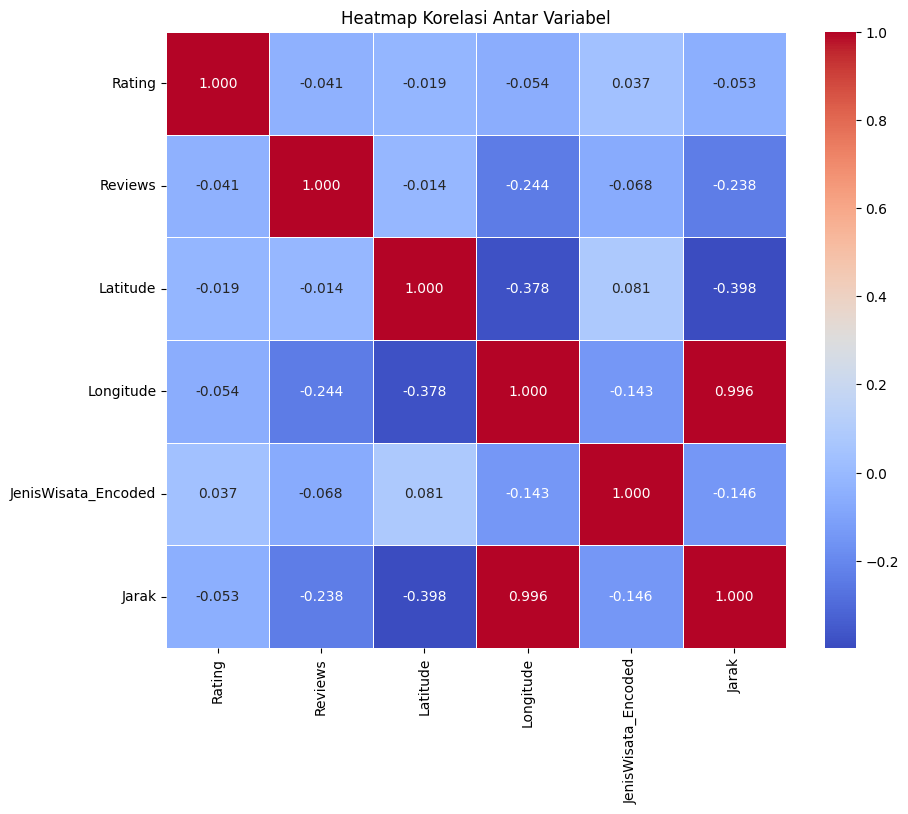

In [30]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## Modeling
  - Split Data
  - Create Model
  - Train Model
  - Using Callbacks
  - Evaluasi
  - Save Model

In [31]:
# Data X dan Y
X = df_cleaned[['Reviews','JenisWisata_Encoded']]
Y = df_cleaned['Rating']

# Bagi data menjadi train dan test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.fillna(X_train.mean(), inplace=True)  # Replace NaNs with mean, or use another imputation strategy
X_test.fillna(X_test.mean(), inplace=True)

print(X_train.shape)
print(X_test.shape)

(728, 2)
(182, 2)


In [32]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Menggunakan beberapa callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
]

# Train model dengan callbacks
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/1000
19/19 [==============================] - 3s 39ms/step - loss: 15.7593 - mse: 15.7593 - mae: 3.7058 - val_loss: 7.7142 - val_mse: 7.7142 - val_mae: 2.4789 - lr: 0.0010
Epoch 2/1000
19/19 [==============================] - 0s 8ms/step - loss: 9.5040 - mse: 9.5040 - mae: 2.7634 - val_loss: 6.9609 - val_mse: 6.9609 - val_mae: 2.3564 - lr: 0.0010
Epoch 3/1000
19/19 [==============================] - 0s 8ms/step - loss: 8.1296 - mse: 8.1296 - mae: 2.5109 - val_loss: 6.0799 - val_mse: 6.0799 - val_mae: 2.1457 - lr: 0.0010
Epoch 4/1000
19/19 [==============================] - 0s 9ms/step - loss: 7.3685 - mse: 7.3685 - mae: 2.3519 - val_loss: 5.4845 - val_mse: 5.4845 - val_mae: 2.0083 - lr: 0.0010
Epoch 5/1000
19/19 [==============================] - 0s 8ms/step - loss: 6.5364 - mse: 6.5364 - mae: 2.1875 - val_loss: 5.0090 - val_mse: 5.0090 - val_mae: 1.8699 - lr: 0.0010
Epoch 6/1000
19/19 [==============================] - 0s 10ms/step - loss: 6.3044 - mse: 6.3044 - mae: 2.1406 - 

In [34]:
# Evaluasi model di atas test set
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f'Mean Squared Error: {mse},\nMean Absolute Error: {mae}')

6/6 [==============================] - 0s 4ms/step
Mean Squared Error: 0.3649779741324921,
Mean Absolute Error: 0.4517274929926946


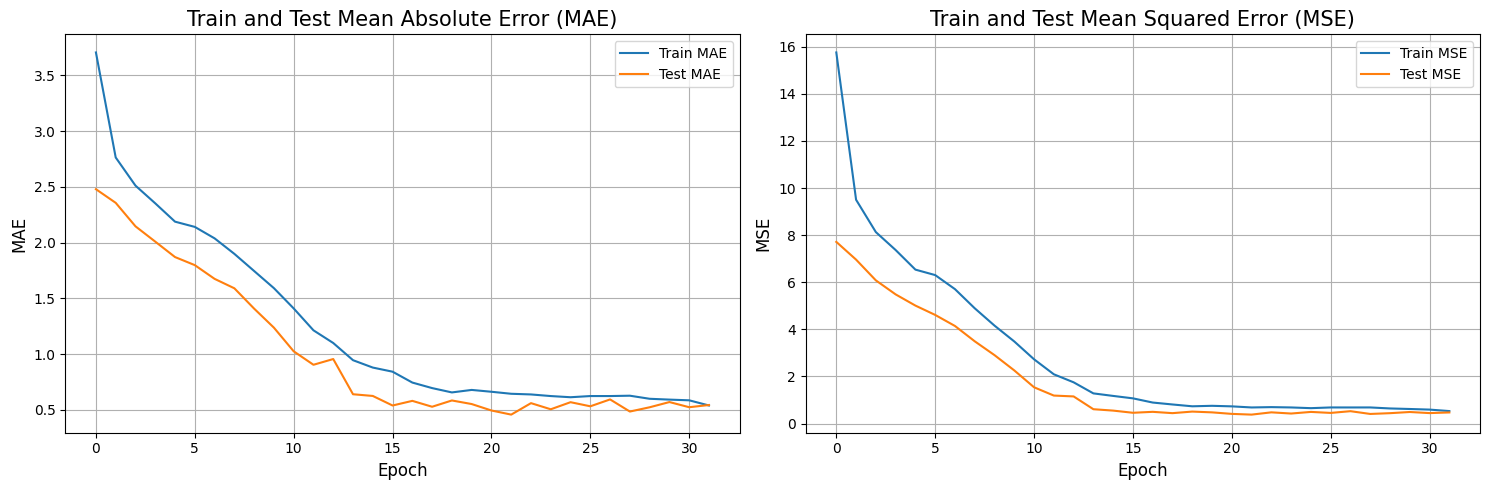

In [35]:
# prompt: Kode untuk Menampilkan Plot Train dan Test MAE MSE, dengan tampilan visualisasi yang menarik

# Plot train and test MAE and MSE
plt.figure(figsize=(15, 5))

# Subplot 1: Train MAE
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('Train and Test Mean Absolute Error (MAE)', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True)

# Subplot 2: Train MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.title('Train and Test Mean Squared Error (MSE)', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
# Simpan model ke dalam file H5
model.save('tourism_recommendation_model.h5')
print("Model berhasil disimpan sebagai 'tourism_recommendation_model.h5'")

Model berhasil disimpan sebagai 'tourism_recommendation_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
# Testing Model Rekomendasi
# Model yang telah disimpan
model = tf.keras.models.load_model('tourism_recommendation_model.h5')

# Data untuk prediksi
X_new = df_cleaned[['Reviews', 'JenisWisata_Encoded']]

# Lakukan prediksi
Y_pred = model.predict(X_new)

# Tampilkan hasil prediksi dengan informasi tambahan
print("Hasil Prediksi Jarak dan Informasi Tambahan:")
for i, pred in enumerate(Y_pred):
    print(f"Data {i+1}:")
    print(f"   Provinsi: {df_cleaned['Provinsi'].iloc[i]}")
    print(f"   Kabupaten/Kota: {df_cleaned['KabupatenKota'].iloc[i]}")
    print(f"   Nama Wisata: {df_cleaned['NamaWisata'].iloc[i]}")
    print(f"   Rating: {df_cleaned['Rating'].iloc[i]}")
    print(f"   Prediksi Rating: {pred[0]:.1f}")
    print(f"   Jenis Wisata: {df_cleaned['JenisWisata'].iloc[i]}")
    print(f"   Jarak: {df_cleaned['Jarak'].iloc[i]:.2f} km")
    print("")

Streaming output truncated to the last 5000 lines.
   Rating: 4.5
   Prediksi Rating: 4.5
   Jenis Wisata: Air
   Jarak: 1024.38 km

Data 356:
   Provinsi: Nusa Tenggara Timur
   Kabupaten/Kota: Alor
   Nama Wisata: Wisata Jempatan Pellas PULAU KURA
   Rating: 4.2
   Prediksi Rating: 4.5
   Jenis Wisata: Air
   Jarak: 995.17 km

Data 357:
   Provinsi: Nusa Tenggara Timur
   Kabupaten/Kota: Alor
   Nama Wisata: Taman Tugu Lilin
   Rating: 4.5
   Prediksi Rating: 4.7
   Jenis Wisata: Taman
   Jarak: 1041.30 km

Data 358:
   Provinsi: Nusa Tenggara Timur
   Kabupaten/Kota: Alor
   Nama Wisata: Pantai Buono, Kab. Alor
   Rating: 3.0
   Prediksi Rating: 4.4
   Jenis Wisata: Air
   Jarak: 1039.77 km

Data 359:
   Provinsi: Nusa Tenggara Timur
   Kabupaten/Kota: Alor
   Nama Wisata: Danau Meriyaka
   Rating: 5.0
   Prediksi Rating: 4.4
   Jenis Wisata: Air
   Jarak: 1096.67 km

Data 360:
   Provinsi: Nusa Tenggara Timur
   Kabupaten/Kota: Alor
   Nama Wisata: Kolam kepiting emas Otvai
   Rati